In [ ]:
## Author: Katherine Shagalov
## CWID: 10463818
## Assignment: HW 9 Clustering

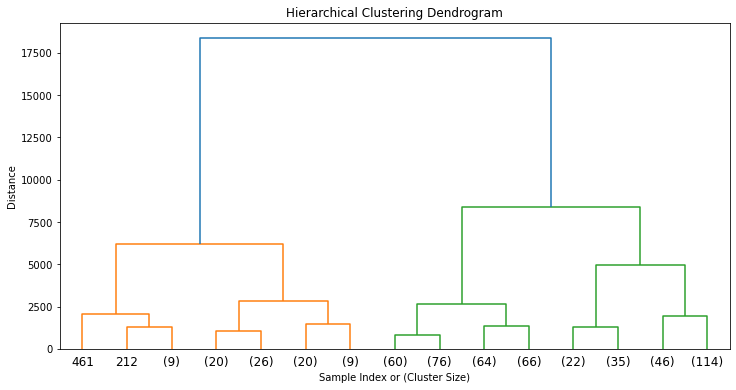

Clustered Rows Against Diagnosis:
cluster     1    2
diagnosis         
B           0  357
M          86  126


In [4]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Load the dataset
url = "C:/Users/kshag/OneDrive/Desktop/classes/CS 513 - Knowledge Discovery and Data Mining/wisc_bc_ContinuousVar.csv"
df = pd.read_csv(url)

# Drop rows with missing values
df.dropna(inplace=True)

# Extract features for clustering
X = df.drop(['id', 'diagnosis'], axis=1).values

# Perform hierarchical clustering
linkage_matrix = linkage(X, method='ward')

# Plot dendrogram for visualization (optional)
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()

# Determine the cluster assignments
k = 2  # Number of clusters
cluster_assignments = fcluster(linkage_matrix, k, criterion='maxclust')

# Add the cluster assignments to the original DataFrame
df['cluster'] = cluster_assignments

# Tabulate the clustered rows against the “diagnosis” column
tabulated_results = pd.crosstab(df['diagnosis'], df['cluster'])
print("Clustered Rows Against Diagnosis:")
print(tabulated_results)


K-Means Clustered Rows Against Diagnosis:
kmeans_cluster    0    1
diagnosis               
B               356    1
M                82  130


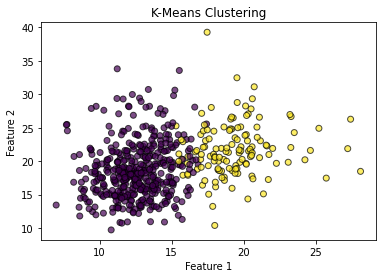

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
url = "C:/Users/kshag/OneDrive/Desktop/classes/CS 513 - Knowledge Discovery and Data Mining/wisc_bc_ContinuousVar.csv"
df = pd.read_csv(url)

# Drop rows with missing values
df.dropna(inplace=True)

# Extract features for clustering
X = df.drop(['id', 'diagnosis'], axis=1).values

# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X)

# Tabulate the clustered rows against the “diagnosis” column
tabulated_results_kmeans = pd.crosstab(df['diagnosis'], df['kmeans_cluster'])
print("K-Means Clustered Rows Against Diagnosis:")
print(tabulated_results_kmeans)

# Plot scatter plot for visualization (optional)
plt.scatter(X[:, 0], X[:, 1], c=df['kmeans_cluster'], cmap='viridis', edgecolors='k', alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
